In [43]:
import pandas as pd
import numpy as np

In [114]:
training_data = pd.read_csv(r'D:\ms\tool and tech\data\project\dengue_features_train.csv')

In [139]:
training_data.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,4/30/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,5/7/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,5/14/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,5/21/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,5/28/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
5,sj,1990,23,6/4/1990,NaN,0.174850,0.254314,0.181743,9.58,299.630000,...,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2
6,sj,1990,24,6/11/1990,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,...,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,4
7,sj,1990,25,6/18/1990,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,...,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,5
8,sj,1990,26,6/25/1990,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,...,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,10
9,sj,1990,27,7/2/1990,NaN,0.121550,0.160683,0.202567,14.41,300.154286,...,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,6


In [116]:
training_data.shape

(1456, 25)

In [117]:
test_data = pd.read_csv(r'D:\ms\tool and tech\data\project\dengue_features_test.csv')

In [118]:
test_data.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [49]:
test_data.shape

(416, 24)

In [50]:
training_data.isnull().any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_t

In [51]:
training_data['ndvi_ne'].fillna(training_data['ndvi_ne'].mean(), inplace=True)
training_data['ndvi_nw'].fillna(training_data['ndvi_nw'].mean(), inplace=True) 
training_data['ndvi_se'].fillna(training_data['ndvi_se'].mean(), inplace=True) 
training_data['ndvi_sw'].fillna(training_data['ndvi_sw'].mean(), inplace=True) 
training_data['precipitation_amt_mm'].fillna(training_data['precipitation_amt_mm'].mean(), inplace=True) 
training_data['reanalysis_air_temp_k'].fillna(training_data['reanalysis_air_temp_k'].mean(), inplace=True) 
training_data['reanalysis_avg_temp_k'].fillna(training_data['ndvi_ne'].mean(), inplace=True) 
training_data['reanalysis_dew_point_temp_k'].fillna(training_data['ndvi_ne'].mean(), inplace=True) 
training_data['reanalysis_max_air_temp_k'].fillna(training_data['ndvi_ne'].mean(), inplace=True) 
training_data['reanalysis_min_air_temp_k'].fillna(training_data['ndvi_ne'].mean(), inplace=True) 
training_data['reanalysis_precip_amt_kg_per_m2'].fillna(training_data['ndvi_ne'].mean(), inplace=True)
training_data['reanalysis_relative_humidity_percent'].fillna(training_data['ndvi_ne'].mean(), inplace=True) 
training_data['reanalysis_sat_precip_amt_mm'].fillna(training_data['ndvi_ne'].mean(), inplace=True) 
training_data['reanalysis_specific_humidity_g_per_kg'].fillna(training_data['ndvi_ne'].mean(), inplace=True) 
training_data['reanalysis_tdtr_k'].fillna(training_data['ndvi_ne'].mean(), inplace=True) 
training_data['station_avg_temp_c'].fillna(training_data['ndvi_ne'].mean(), inplace=True) 
training_data['station_diur_temp_rng_c'].fillna(training_data['ndvi_ne'].mean(), inplace=True)
training_data['station_max_temp_c'].fillna(training_data['station_max_temp_c'].mean(), inplace=True)
training_data['station_min_temp_c'].fillna(training_data['station_min_temp_c'].mean(), inplace=True)
training_data['station_precip_mm'].fillna(training_data['station_precip_mm'].mean(), inplace=True)

In [52]:
training_data.isnull().any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_t

In [53]:
test_data.isnull().any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_t

In [54]:
test_data['ndvi_ne'].fillna(test_data['ndvi_ne'].mean(), inplace=True)
test_data['ndvi_nw'].fillna(test_data['ndvi_nw'].mean(), inplace=True) 
test_data['ndvi_se'].fillna(test_data['ndvi_se'].mean(), inplace=True) 
test_data['ndvi_sw'].fillna(test_data['ndvi_sw'].mean(), inplace=True) 
test_data['precipitation_amt_mm'].fillna(test_data['precipitation_amt_mm'].mean(), inplace=True) 
test_data['reanalysis_air_temp_k'].fillna(test_data['reanalysis_air_temp_k'].mean(), inplace=True) 
test_data['reanalysis_avg_temp_k'].fillna(test_data['ndvi_ne'].mean(), inplace=True) 
test_data['reanalysis_dew_point_temp_k'].fillna(test_data['ndvi_ne'].mean(), inplace=True) 
test_data['reanalysis_max_air_temp_k'].fillna(test_data['ndvi_ne'].mean(), inplace=True) 
test_data['reanalysis_min_air_temp_k'].fillna(test_data['ndvi_ne'].mean(), inplace=True) 
test_data['reanalysis_precip_amt_kg_per_m2'].fillna(test_data['ndvi_ne'].mean(), inplace=True)
test_data['reanalysis_relative_humidity_percent'].fillna(test_data['ndvi_ne'].mean(), inplace=True) 
test_data['reanalysis_sat_precip_amt_mm'].fillna(test_data['ndvi_ne'].mean(), inplace=True) 
test_data['reanalysis_specific_humidity_g_per_kg'].fillna(test_data['ndvi_ne'].mean(), inplace=True) 
test_data['reanalysis_tdtr_k'].fillna(test_data['ndvi_ne'].mean(), inplace=True) 
test_data['station_avg_temp_c'].fillna(test_data['ndvi_ne'].mean(), inplace=True) 
test_data['station_diur_temp_rng_c'].fillna(test_data['ndvi_ne'].mean(), inplace=True)
test_data['station_max_temp_c'].fillna(test_data['station_max_temp_c'].mean(), inplace=True)
test_data['station_min_temp_c'].fillna(test_data['station_min_temp_c'].mean(), inplace=True)
test_data['station_precip_mm'].fillna(test_data['station_precip_mm'].mean(), inplace=True)

In [55]:
test_data.isnull().any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                  False
ndvi_nw                                  False
ndvi_se                                  False
ndvi_sw                                  False
precipitation_amt_mm                     False
reanalysis_air_temp_k                    False
reanalysis_avg_temp_k                    False
reanalysis_dew_point_temp_k              False
reanalysis_max_air_temp_k                False
reanalysis_min_air_temp_k                False
reanalysis_precip_amt_kg_per_m2          False
reanalysis_relative_humidity_percent     False
reanalysis_sat_precip_amt_mm             False
reanalysis_specific_humidity_g_per_kg    False
reanalysis_tdtr_k                        False
station_avg_temp_c                       False
station_diur_temp_rng_c                  False
station_max_t

In [56]:
training_data['city'] = training_data['city'].astype('category') 
training_data['city'] = training_data['city'].cat.codes

training_data['week_start_date'] = training_data['week_start_date'].astype('category') 
training_data['week_start_date'] = training_data['week_start_date'].cat.codes

test_data['city'] = test_data['city'].astype('category') 
test_data['city'] = test_data['city'].cat.codes

test_data['week_start_date'] = test_data['week_start_date'].astype('category') 
test_data['week_start_date'] = test_data['week_start_date'].cat.codes

In [124]:
Q1 = training_data.quantile(0.25)
Q3 = training_data.quantile(0.75)
IQR = Q3 - Q1
print(f'first quartiles for each column is:\n {Q1} ')
print(f'Third quartiles for each column is:\n {Q3} ')
print(f'IQR for each column is:\n {IQR} ')

first quartiles for each column is:
 year                                     1997.000000
weekofyear                                 13.750000
ndvi_ne                                     0.044950
ndvi_nw                                     0.049217
ndvi_se                                     0.155087
ndvi_sw                                     0.144209
precipitation_amt_mm                        9.800000
reanalysis_air_temp_k                     297.658929
reanalysis_avg_temp_k                     298.257143
reanalysis_dew_point_temp_k               294.118929
reanalysis_max_air_temp_k                 301.000000
reanalysis_min_air_temp_k                 293.900000
reanalysis_precip_amt_kg_per_m2            13.055000
reanalysis_relative_humidity_percent       77.177143
reanalysis_sat_precip_amt_mm                9.800000
reanalysis_specific_humidity_g_per_kg      15.557143
reanalysis_tdtr_k                           2.328571
station_avg_temp_c                         26.300000
station_d

First quratile for the column "total_cases" is: 5.0 
Third quratile for the column "total_cases" is: 28.0 
IQR for the column "total_cases" is: 23.0


(1332,)

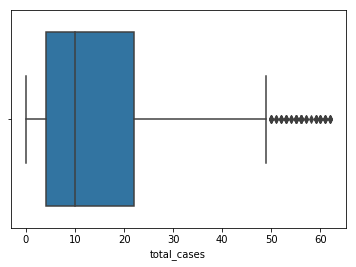

In [137]:
print(f'First quratile for the column "total_cases" is: {Q1[22]} ')
print(f'Third quratile for the column "total_cases" is: {Q3[22]} ')
print(f'IQR for the column "total_cases" is: {IQR[22]}')
training_data = training_data[(training_data['total_cases'] > (Q1[22] - 1.5 * IQR[22])) &
            (training_data['total_cases'] < (Q3[22] + 1.5 * IQR[22]))]
sns.boxplot(x = training_data['total_cases'])
training_data['total_cases'].shape

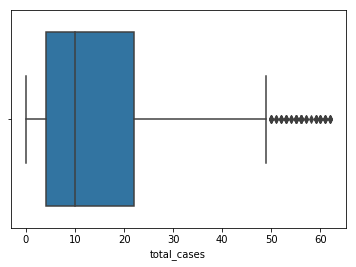

In [138]:
import seaborn as sns
sns.boxplot(x=training_data['total_cases'])

In [72]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error

In [91]:

y_training = training_data['total_cases']
x_training = training_data.drop('total_cases' ,axis=1)


x_train, x_test, y_train, y_test = train_test_split(x_training, y_training, test_size=0.24, random_state=2)

# Model initialization
regression_model = LinearRegression()
# Fit the data(train the model)
regression_model.fit(x_train, y_train)
# Predict
y_predicted = regression_model.predict(x_test)

# model evaluation
mae = mean_absolute_error(y_test, y_predicted)
mae

18.592076673728894

In [92]:
from sklearn.metrics import mean_absolute_error

y_predicted = regression_model.predict(test_data)
print(y_predicted)

[ 29.72092082  23.72675138  30.96439047  34.75131917  37.26865828
  36.35207956  34.84136213  42.43875775  43.50947816  41.51293235
  31.48134468  39.15658361  43.81913931  41.07403148  46.15486256
  51.67359306  49.11222527  50.25738964  55.55822093  59.08169724
  47.46474492  46.12923989  53.00058502  45.77681604  50.29162294
  40.23782707  41.296196    43.28515315  38.75988319  39.90560863
  37.37619426  20.08512349  25.4280324   33.36552711  23.9676646
  11.75156996  -0.62563786   5.50468333  15.98771732  12.01125177
  12.07858191   8.7797225    8.58549233   7.83968532   3.10836809
  17.98698643   1.19410337   6.33115404   7.26920754   8.86714612
  12.6105864   19.58338951  20.94313593  18.85524911  25.87420555
  21.77276953  28.09362828  38.36922322  32.90167381  36.83207796
  36.01878408  38.82265241  44.04961949  42.95472638  43.18147408
  45.87331172  39.45720694  43.24914331  43.23839489  50.23805688
  49.66923625  47.3463108   52.53923652  48.5227044   50.25254539
  51.562112

In [109]:
df =pd.read_csv(r'D:\ms\tool and tech\data\project\dengue_features_test.csv')
df.shape

(416, 24)

In [110]:
import math
df.head()



,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,2008,18,2008-04-29,-0.0189,-0.018900,0.102729,0.091200,78.60,298.492857,...,25.37,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2
1,sj,2008,19,2008-05-06,-0.0180,-0.012400,0.082043,0.072314,12.56,298.475714,...,21.83,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3
2,sj,2008,20,2008-05-13,-0.0015,NaN,0.151083,0.091529,3.66,299.455714,...,4.12,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0
3,sj,2008,21,2008-05-20,NaN,-0.019867,0.124329,0.125686,0.00,299.690000,...,2.20,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3
4,sj,2008,22,2008-05-27,0.0568,0.039833,0.062267,0.075914,0.76,299.780000,...,4.36,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1


In [112]:
df = df.iloc[:, 0:3]
df['total_cases'] = y_predicted
df['total_cases'] = df['total_cases'].astype(int)
df

,city,year,weekofyear,total_cases
0,sj,2008,18,29
1,sj,2008,19,23
2,sj,2008,20,30
3,sj,2008,21,34
4,sj,2008,22,37
5,sj,2008,23,36
6,sj,2008,24,34
7,sj,2008,25,42
8,sj,2008,26,43
9,sj,2008,27,41


In [113]:
submit = df
submit.to_csv(r'D:\ms\tool and tech\data\project\submitfa.csv')